In [6]:
from reader import SingleFile, MultipleFiles
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import cm
import os, numpy as np
from scipy.signal import savgol_filter
from scipy import interpolate

files = ["files/LN&B_FC+LTC_CA5.mpr",\
         "files/LN1B_LTC_ESRF_continue_1_C03.mpr",\
         "files/LN1B_LTC_ESRF_continue_2_sp50_C01.mpr",\
         "files/LN1B_LTC_ESRF_continue_3_sp50_C01.mpr",\
         "files/LN1B_LTC_ESRF_continue_4_C03.mpr",\
         "files/LN1B_LTC_ESRF_continue_5_C03.mpr"]


file = "files/LN&B_FC+LTC_CA5.mpr"

In [7]:
#initialize Object
f = SingleFile(file)

In [9]:
f.readFile() #Test

,flags,Ns,I Range,time/s,control/V/mA,Ewe/V,I/mA,dq/mA.h,(Q-Qo)/mA.h,|Energy|/W.h,Q charge/discharge/mA.h,half cycle
0,7,0,115,0.000000e+00,0.0,2.800283,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,7,0,115,1.000000e+00,0.0,2.800323,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,7,0,115,2.000000e+00,0.0,2.800283,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,7,0,115,3.000000e+00,0.0,2.800323,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,7,0,115,4.000000e+00,0.0,2.800244,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1476642,1,10,116,1.475097e+06,-0.4,3.914068,-0.399831,-0.000111,0.521987,0.567277,-0.312172,347
1476643,1,10,116,1.475098e+06,-0.4,3.913360,-0.399791,-0.000111,0.521876,0.567277,-0.312283,347
1476644,1,10,116,1.475099e+06,-0.4,3.912651,-0.399831,-0.000111,0.521765,0.567277,-0.312394,347
1476645,1,10,116,1.475100e+06,-0.4,3.911903,-0.399772,-0.000111,0.521654,0.567278,-0.312505,347


In [4]:
# f.extractCycles(f.readFile(), 7, 10) Test

In [ ]:
for i in files:
    x = SingleFile(i)
    if "LN&B_FC+LTC_CA5.mpr" in i:
        x.extractCycles(x.readFile(), 7, 10)
    else:
        x.extractCycles(x.readFile(), 1, 4)

folder didn't exit, created!
extraction started...
folder output exists
extraction started...
folder output exists
extraction started...
folder output exists
extraction started...
folder output exists
extraction started...
folder output exists
extraction started...


In [ ]:
'''So Cycle one files are:
output/LN&B_FC+LTC_CA5_0_charge.csv and output/LN&B_FC+LTC_CA5_0_discharge.csv
at output/LN1B_LTC_ESRF_continue_1_C03_129_charge.csv we should be at 300 cycles in total (around there at least)
at output/LN1B_LTC_ESRF_continue_2_sp50_C01_23_charge.csv we should be at 500 cycles in total (around that)
at output/LN1B_LTC_ESRF_continue_5_C03_48_charge.csv we should be at 700 cycles
'''
# Let's test this!

'So Cycle one files are:\noutput/LN&B_FC+LTC_CA5_0_charge.csv and output/LN&B_FC+LTC_CA5_0_discharge.csv\nat output/LN1B_LTC_ESRF_continue_1_C03_129_charge.csv we should be at 300 cycles in total (around there at least)\nat output/LN1B_LTC_ESRF_continue_2_sp50_C01_23_charge.csv we should be at 500 cycles in total (around that)\nat output/LN1B_LTC_ESRF_continue_4_C03_95_charge.csv we should be at 700 cycles\n'

In [ ]:
lis_ch = ["output/LN&B_FC+LTC_CA5_20_charge.csv",\
          "output/LN1B_LTC_ESRF_continue_1_C03_129_charge.csv",\
          "output/LN1B_LTC_ESRF_continue_2_sp50_C01_23_charge.csv",\
          "output/LN1B_LTC_ESRF_continue_5_C03_48_charge.csv"]


lis_disch = ["output/LN&B_FC+LTC_CA5_20_discharge.csv",\
             "output/LN1B_LTC_ESRF_continue_1_C03_129_discharge.csv",\
             "output/LN1B_LTC_ESRF_continue_2_sp50_C01_23_discharge.csv",\
             "output/LN1B_LTC_ESRF_continue_5_C03_48_discharge.csv"]

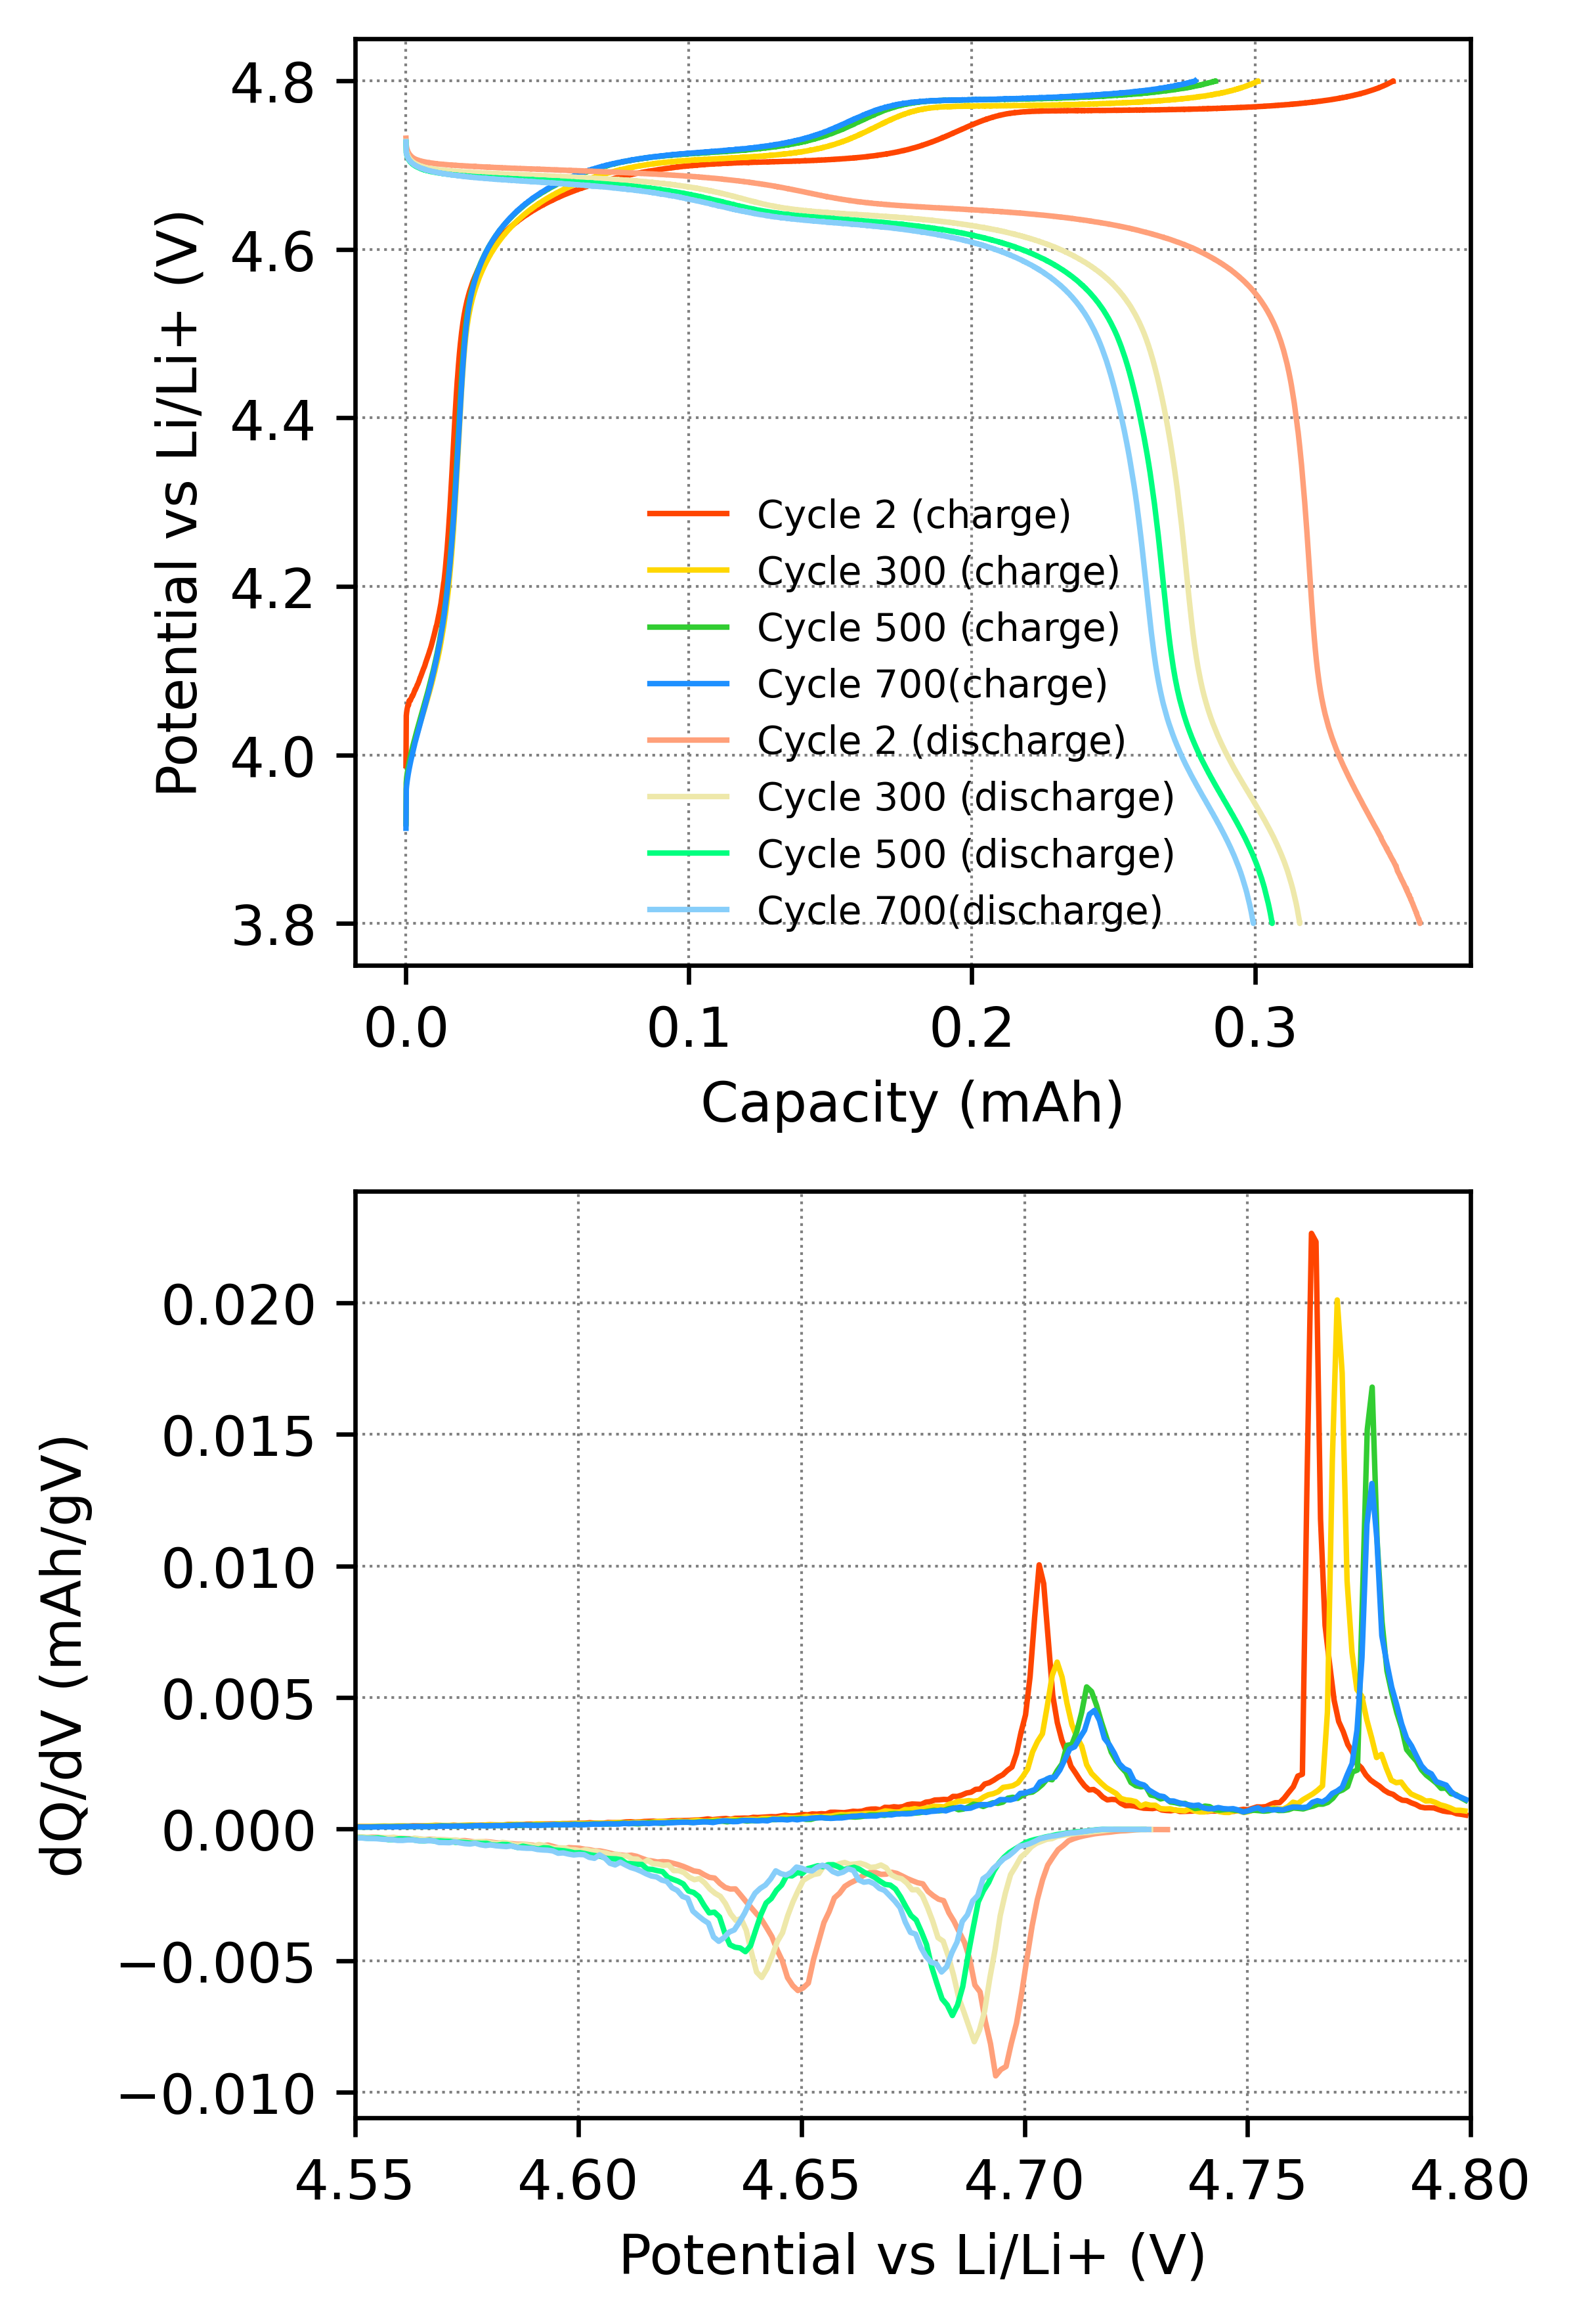

In [122]:
c_ch = ['orangered','gold','limegreen','dodgerblue']
l_ch = ['Cycle 2 (charge)','Cycle 300 (charge)','Cycle 500 (charge)','Cycle 700(charge)'] 
c_dis = ['lightsalmon','palegoldenrod','springgreen','lightskyblue']
l_dis = ['Cycle 2 (discharge)','Cycle 300 (discharge)','Cycle 500 (discharge)','Cycle 700(discharge)'] 
fig, ax = plt.subplots(nrows=2, ncols=1, dpi=600, figsize=(4,6))

for n,i in enumerate(lis_ch):
    data = pd.read_csv(i)
    x_charge = data['Ewe/V'].to_numpy()
    y_charge = data['Q charge/discharge/mA.h'].to_numpy()
    f = interpolate.interp1d(x_charge, y_charge, kind="linear")
    x_int_charge = np.linspace(x_charge[0],x_charge[-1], 800)
    y_int_charge = f(x_int_charge)
    y_smooth_charge = savgol_filter(y_int_charge, 5, 2)
    y_diff_charge = np.diff(y_smooth_charge)
    ax[1].plot(x_int_charge[:-1], y_diff_charge[:],color=c_ch[n], label=l_ch[n], lw=1)

    ax[0].plot(data['Q charge/discharge/mA.h'], data['Ewe/V'],\
            color=c_ch[n], lw=1, label=l_ch[n])
    
for n,i in enumerate(lis_disch):
    data = pd.read_csv(i)
    x_discharge = data['Ewe/V'].to_numpy()
    y_discharge = data['Q charge/discharge/mA.h'].to_numpy()
    f = interpolate.interp1d(x_discharge, y_discharge, kind="linear")
    x_int_discharge = np.linspace(x_discharge[0],x_discharge[-1], 800)
    y_int_discharge = f(x_int_discharge)
    y_smooth_charge = savgol_filter(y_int_discharge, 5, 2)
    y_diff_discharge = np.diff(y_smooth_charge)
    ax[1].plot(x_int_discharge[:-1], y_diff_discharge[:],color=c_dis[n], label=l_dis[n], lw=1)
    ax[0].plot(abs(data['Q charge/discharge/mA.h']), data['Ewe/V'],\
            color=c_dis[n], lw=1, label=l_dis[n])
    
ax[0].grid(ls=":", color='gray', lw=0.5)
ax[1].grid(ls=":", color='gray', lw=0.5)
ax[0].set_xlabel("Capacity (mAh)")
ax[0].set_ylabel("Potential vs Li/Li+ (V)")
ax[1].set_ylabel("dQ/dV (mAh/gV)")
ax[1].set_xlabel("Potential vs Li/Li+ (V)")
ax[0].legend(frameon=False, fontsize=7)
ax[1].set_xlim(4.55, 4.80)
plt.tight_layout()
plt.savefig("galv_dqdv.pdf", format='pdf', bbox_inches='tight')
plt.show()

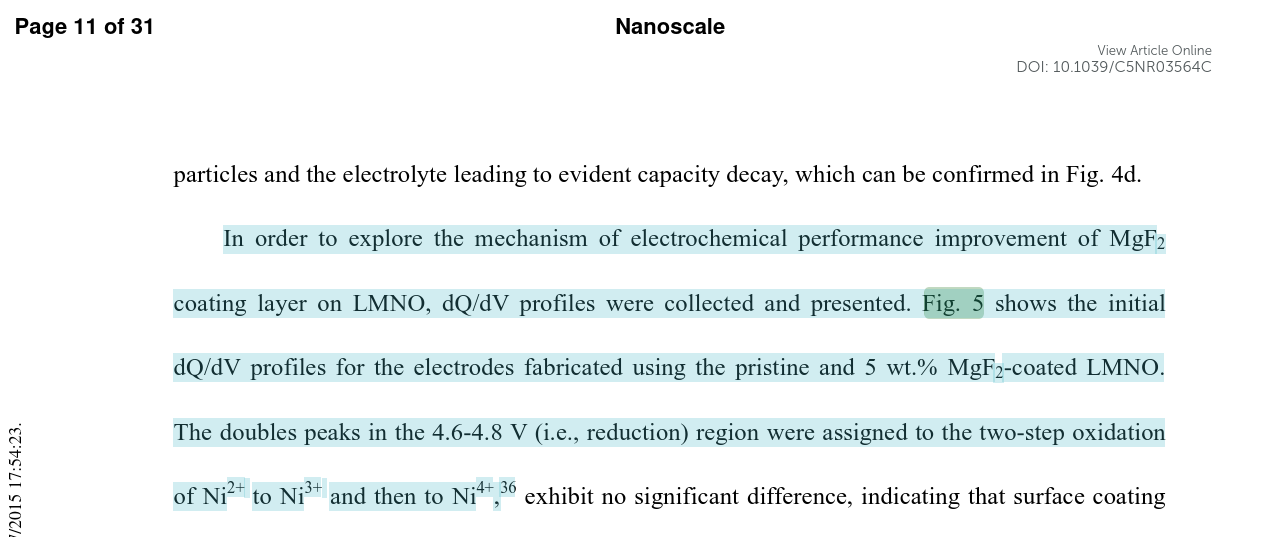